## CMPE 462 HOMEWORK 2


In [1]:
# Allowed Libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# Part 1: Dimensionality Reduction

# A: Creating Datasets
Steps:
* Generate 500 points from $\frac{x^2}{2^2}+ \frac{y^2}{5^2} \le 1$(From ellipse with 2, 5 radius on the x and y axes respectively). Example way:
    - Generate 500 angle values $\{\theta^t\}$ in range $[-\pi,+\pi]$
    - Generate 500 values $\{r^t\}$ in range $[0,1]$
    - Generate 500 points $\{x^t,y^t\}$ where $x^t = 2r^tsin(\theta^t)$ and $y^t = 5r^tcos(\theta^t)$.
* Generate 3 set of labels. Do it by dividing data using following Lines (eg. one side of line is label 0, other side is label 1)
    - $y=0$ line
    - $x=0$ line 
    - $y=3x +1$ line 
* Visualize points with each set of labels in subplots with 1 row, 3 columns where each column corresponds to one set of labels. (Use different colors for each label.)  

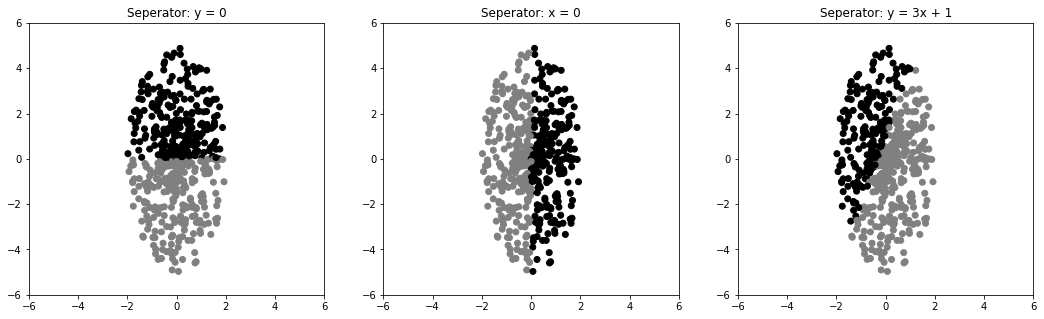

In [2]:
SIZE = 500
COLORS = ['gray','black']

def generate_labels(data):
    labels = []
    for p in data:
        first_label = 0 if p[1] < 0 else 1
        second_label = 0 if p[0] < 0 else 1
        third_label = 0 if (p[1] < (3*p[0] + 1)) else 1
        labels.append((first_label,second_label,third_label))
    return np.array(labels)
        
def generate_x_y_values(theta_values,r_values):
    x_values = []
    y_values = []
    for index,r in enumerate(r_values):
        x_values.append(2*r*np.sin(theta_values[index]))
        y_values.append(5*r*np.cos(theta_values[index]))
    return np.array(x_values),np.array(y_values)

def create_dataset():
    #theta_values = np.random.uniform(-np.pi,np.pi,size=SIZE)
    theta_values = np.random.uniform(-180,180,size=SIZE)
    r_values = np.random.rand(SIZE)
    x_values,y_values = generate_x_y_values(theta_values,r_values)
    data = np.zeros([SIZE,2])
    data[:,0] = x_values[:]
    data[:,1] = y_values[:]
    return data

def visualize_data(data,labels):
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))

    x_values = data[:,0]
    y_values = data[:,1]
    lim = [-6.0,6.0]
    
    axs[0].scatter(x_values, y_values, c=labels[:,0], cmap=matplotlib.colors.ListedColormap(COLORS))
    axs[0].set_xlim(lim)
    axs[0].set_ylim(lim)
    axs[0].set_title('Seperator: y = 0')
    
    axs[1].scatter(x_values, y_values, c=labels[:,1], cmap=matplotlib.colors.ListedColormap(COLORS))
    axs[1].set_xlim(lim)
    axs[1].set_ylim(lim)
    axs[1].set_title('Seperator: x = 0')
    
    axs[2].scatter(x_values, y_values, c=labels[:,2], cmap=matplotlib.colors.ListedColormap(COLORS))
    axs[2].set_xlim(lim)
    axs[2].set_ylim(lim)
    axs[2].set_title('Seperator: y = 3x + 1')
    
    
    plt.show()
    
data = create_dataset()
labels = generate_labels(data)

visualize_data(data,labels)

# B: Applying PCA
Steps:
* Write PCA function.
* Apply PCA to data you generated.
* Visualize each set of labels using first principle component. 
* Visualize each set of labels using second principle component. 

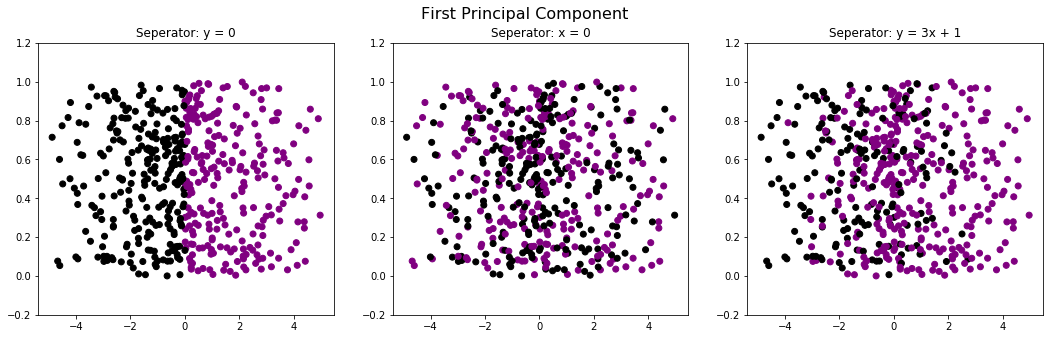

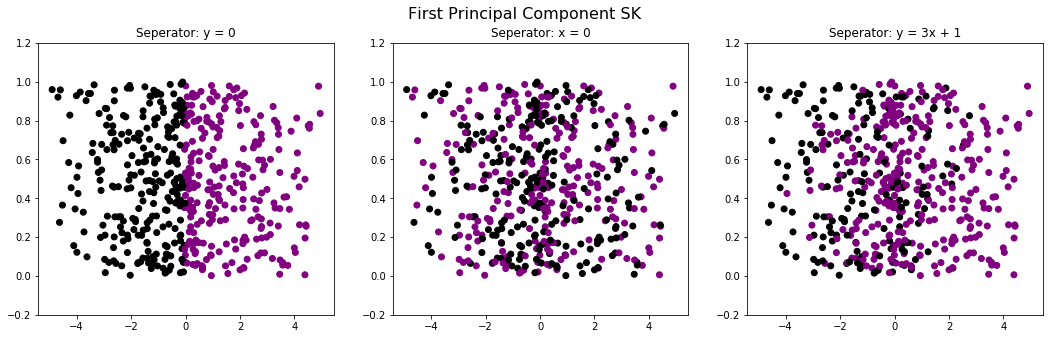

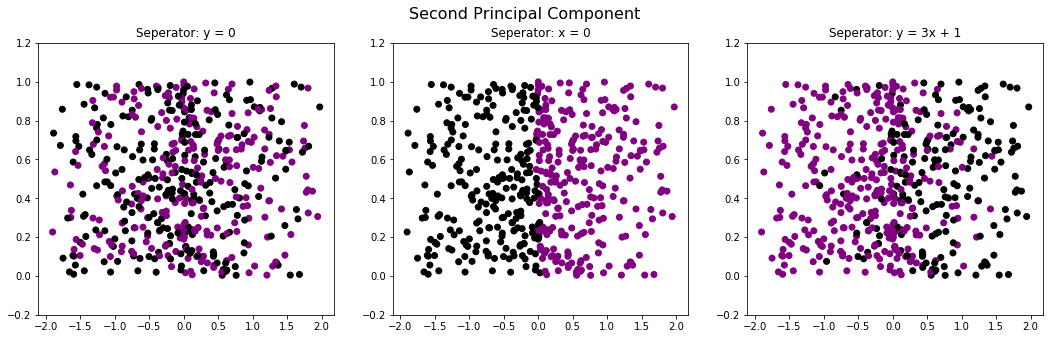

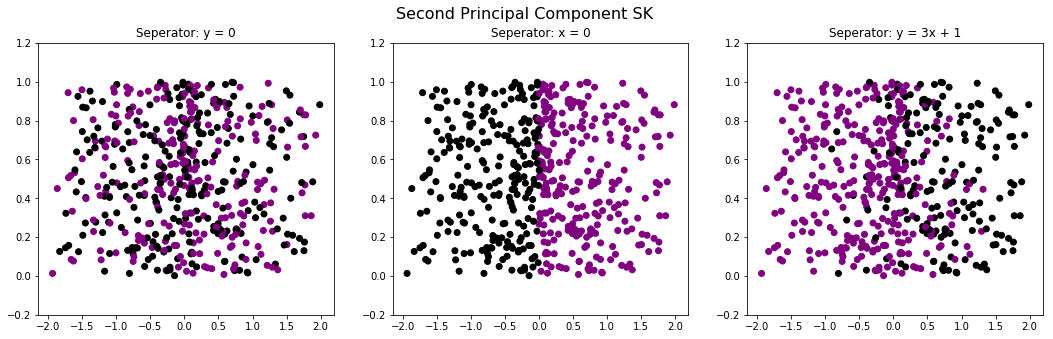

In [3]:
from sklearn.decomposition import PCA
COLORS = ['purple','black']
def pca(data):
    covariance_matrix = np.cov(data.T)
    
    eigenvalues,eigenvectors = np.linalg.eig(covariance_matrix)
    sorted_indexes = np.argsort(eigenvalues)
    pc1_index = sorted_indexes[-1]
    pc2_index = sorted_indexes[-2]
    
    pc1_eigenvector = eigenvectors[pc1_index]
    pc2_eigenvector = eigenvectors[pc2_index]
    
    pc1 = data.dot(pc1_eigenvector)
    pc2 = data.dot(pc2_eigenvector)
    return pc1,pc2

def visualize_pca(x,labels,title):
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))

    lim = [-0.2,1.2]
    y = np.random.rand(SIZE)
    
    fig.suptitle(title, fontsize=16)
    axs[0].scatter(x, y, c=labels[:,0], cmap=matplotlib.colors.ListedColormap(COLORS))
    axs[0].set_ylim(lim)
    axs[0].set_title('Seperator: y = 0')

    axs[1].scatter(x, y, c=labels[:,1], cmap=matplotlib.colors.ListedColormap(COLORS))
    axs[1].set_ylim(lim)
    axs[1].set_title('Seperator: x = 0')

    axs[2].scatter(x, y, c=labels[:,2], cmap=matplotlib.colors.ListedColormap(COLORS))
    axs[2].set_ylim(lim)
    axs[2].set_title('Seperator: y = 3x + 1')

    plt.show()

    
def sk_pca(data):
    pca = PCA()
    res = pca.fit_transform(data)

    pc1_true = res[:,0] 
    pc2_true = res[:,1]
    
    return pc1_true,pc2_true

pc1,pc2 = pca(data)
pc1_true,pc2_true = sk_pca(data)

visualize_pca(pc1,labels,"First Principal Component")
visualize_pca(pc1_true,labels,"First Principal Component SK")

visualize_pca(pc2,labels,"Second Principal Component")
visualize_pca(pc2_true,labels,"Second Principal Component SK")

# C: Applying LDA
Steps:
* Apply LDA(https://scikit-learn.org/stable/modules/lda_qda.html) to data for each label set. You can use sklearn implementation.
* Visualize each set of labels using first component of corresponding LDA. 

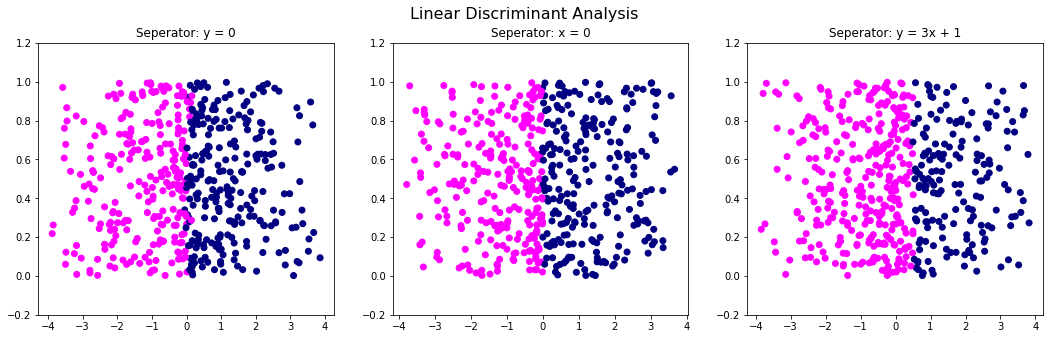

In [4]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
COLORS = ['magenta','navy']
def lda(data,labels):    
    clf = LinearDiscriminantAnalysis()
    projected_data = clf.fit(data,y=labels).transform(data)
    return projected_data

def visualize_lda(models,labels,title):
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))

    lim = [-0.2,1.2]
    y = np.random.rand(SIZE)
    
    fig.suptitle(title, fontsize=16)
    axs[0].scatter(models[0], y, c=labels[:,0], cmap=matplotlib.colors.ListedColormap(COLORS))
    axs[0].set_ylim(lim)
    axs[0].set_title('Seperator: y = 0')

    axs[1].scatter(models[1], y, c=labels[:,1], cmap=matplotlib.colors.ListedColormap(COLORS))
    axs[1].set_ylim(lim)
    axs[1].set_title('Seperator: x = 0')

    axs[2].scatter(models[2], y, c=labels[:,2], cmap=matplotlib.colors.ListedColormap(COLORS))
    axs[2].set_ylim(lim)
    axs[2].set_title('Seperator: y = 3x + 1')

    plt.show()
    
lda_models = [lda(data,labels[:,i]) for i in range(3)]
visualize_lda(lda_models,labels,"Linear Discriminant Analysis")

# D: Nonlinear Data
Steps:
* Use generated data below.
* Apply PCA and LDA to this data, and visualize it(seperately).

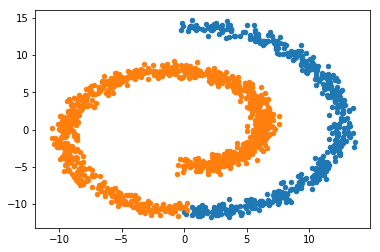

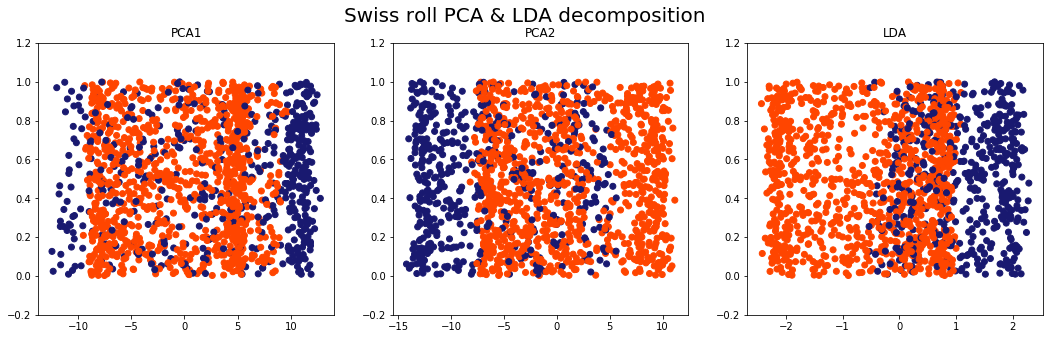

In [9]:
def genData():
    from sklearn.datasets import make_swiss_roll 
    n_samples = 1500
    noise = 0.5
    X, t = make_swiss_roll(n_samples, noise)
    # Make it thinner
    fig = plt.figure()
    Data = np.zeros([1500,2])
    Data[:,0] = X[:,0]
    Data[:,1] = X[:,2]
    Labels = np.zeros([1500,])
    Labels[t>11]=1

    plt.scatter(Data[Labels==1, 0], Data[Labels==1, 1],
       s=20,)
    plt.scatter(Data[Labels==0, 0], Data[Labels==0, 1],
       s=20,)
    return Data,Labels
Data,Labels=genData()

COLORS = ['orangered','midnightblue']
def visualize_data(pc1,pc2,lda,labels):
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))

    lim = [-0.2,1.2]
    y = np.random.rand(len(pc1))
    
    fig.suptitle('Swiss roll PCA & LDA decomposition', fontsize=20)
    axs[0].scatter(pc1, y, c=labels, cmap=matplotlib.colors.ListedColormap(COLORS))
    axs[0].set_ylim(lim)
    axs[0].set_title('PCA1')

    axs[1].scatter(pc2, y, c=labels, cmap=matplotlib.colors.ListedColormap(COLORS))
    axs[1].set_ylim(lim)
    axs[1].set_title('PCA2')

    axs[2].scatter(lda, y, c=labels, cmap=matplotlib.colors.ListedColormap(COLORS))
    axs[2].set_ylim(lim)
    axs[2].set_title('LDA')

    plt.show()

pc1_,pc2_ = pca(Data)
lda_ = lda(Data,Labels)
visualize_data(pc1_,pc2_,lda_,Labels)

# Part 2: Parametric and Non-Parametric Classification.

Download points2d.dat from https://www.cmpe.boun.edu.tr/~emre/courses/cmpe462/material/hws/hw2/points2d.dat. The sample includes 6000 instances. Each instance is represented by a feature vector of 2 dimensions. The third column corresponds to the class (0/1/2) of the instance.

## A: Mixture of Gaussians. 

Steps:
* Implement mixture of gaussians.
* Divide data to training and validation and test sets.
* At training:
    - Divide all data to their respective classes.
    - Run mixture of gaussians with k=1,2,3 using different initial points (the general practice is to use k-means to initialize the means, you can use sklearn implementation of k-means). 
* At validation, select best model:
    - Using validation data, select best number of gaussians for each class using prediction error.
* On test set, report (for the best model):
    - the number of Gaussians for class 0, 1 and 2,
    - the prediction error, and
    - the confusion matrix.

In [28]:
percentages = [60,20,20]

def read_data():
    data = []
    with open('points2d.dat') as fp:
        for line in fp:
            raw = line.split()
            converted = [float(raw[0]),float(raw[1]),int(raw[2])]
            data.append(converted)
    return np.array(data)

def split_data(data):
    first_seperator = (int)(percentages[0]*len(data)/100.0)
    second_seperator = (int)((percentages[0]+percentages[1])*len(data)/100.0)
    
    training_data = data[0:first_seperator]
    validation_data = data[first_seperator:second_seperator]
    test_data = data[second_seperator:]
    
    return training_data,validation_data,test_data
    
data = read_data()
training_data, validation_data, test_data = split_data(data)

3600
1200
1200
[3]


## B: K-Nearest Neighbor
Steps:
* Implement k-nearest neighbor. 
* Run it with k=1,10,40. 
* Using test set, Report
    - best k,
    - prediction error for all k’s.
    - confusion matrix for all k’s.